In [1]:
from imports import *
PATH = '../data/midwest_filter.csv'
df = pd.read_csv(PATH)

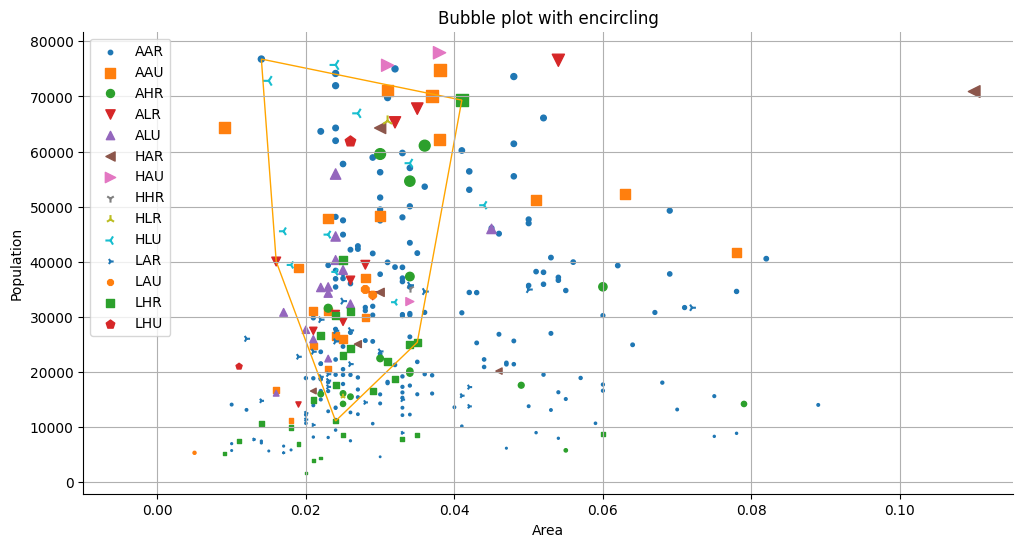

In [14]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1)

# prepare the data for plotting
size_total = df['poptotal'].sum()

# we want every group to have a different marker
markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'X', 'D', 'd']

# iterate over each category and plot the data.
for cat, marker in zip(sorted(list(df['category'].unique())), markers):
    # filter x and the y for each category
    ar = df[df['category'] == cat]['area']
    pop = df[df['category'] == cat]['poptotal']
    
    # this will allow us to set a specific size for each group.
    size = pop/size_total
    
    # plot the data
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker)
    
# ----------------------------------------------------------------------------------------
# create an encircle
# based on this solution
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

# steps to take:

# filter a specific group selecting state OH
encircle_data = df[df['state'] == 'OH']

# separate x and y
encircle_x = encircle_data['area']
encircle_y = encircle_data['poptotal']

p = np.c_[encircle_x, encircle_y]

# using ConvexHull (we imported it before) to calculate the limits of the polygon
hull = ConvexHull(p)

# create the polygon with a specific color based on the vertices of our data/hull
poly = plt.Polygon(p[hull.vertices,:], ec='orange', fc = 'none')

# add the patch to the axes/plot
ax.add_patch(poly)

ax.spines['top'].set_color('None')
ax.spines['right'].set_color('None')

# set a specific label fo reach axis
ax.set_xlabel('Area')
ax.set_ylabel('Population')

ax.set_xlim(-0.01)
ax.set_title('Bubble plot with encircling')
ax.legend(loc = 'upper left', fontsize=10)
plt.grid()